# California Dataset House Price Prediction

---------------------------------------------------------------------------------------------

### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_housing = pd.read_csv('Housing.csv')
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Preprocess ocean_proximity

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Drop Nan values

In [4]:
df_housing.dropna(inplace=True)

In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Train and Test Data

In [6]:
from sklearn.model_selection import train_test_split
X = df_housing.drop(['median_house_value'], axis=1) # X is the dataframe without the traget variable
y = df_housing['median_house_value'] # y is the target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN,218200.0
14855,-117.07,32.65,12.0,4131.0,891.0,2272.0,840.0,3.4701,NEAR OCEAN,204900.0
3295,-122.52,38.99,16.0,975.0,219.0,337.0,155.0,1.6607,INLAND,77800.0
11236,-117.96,33.81,34.0,1416.0,277.0,980.0,284.0,4.7772,<1H OCEAN,182500.0
16442,-121.29,38.14,34.0,1500.0,337.0,674.0,282.0,2.5150,INLAND,110800.0
...,...,...,...,...,...,...,...,...,...,...
5283,-118.46,34.06,20.0,5448.0,1532.0,2202.0,1442.0,4.2554,<1H OCEAN,500001.0
16424,-121.38,37.88,44.0,1158.0,226.0,1094.0,224.0,2.6842,INLAND,156300.0
3416,-118.41,34.29,32.0,1591.0,320.0,1818.0,306.0,4.2969,<1H OCEAN,145800.0
5889,-118.34,34.15,40.0,3068.0,756.0,1190.0,695.0,3.5637,<1H OCEAN,497400.0


In [9]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7250
INLAND        5196
NEAR OCEAN    2118
NEAR BAY      1779
ISLAND           3
Name: count, dtype: int64

In [10]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity']))
train_data = train_data.drop(['ocean_proximity'],axis=1)
# Convert boolean columns to integers
boolean_columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
train_data[boolean_columns] = train_data[boolean_columns].astype(int)

In [11]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

<Axes: >

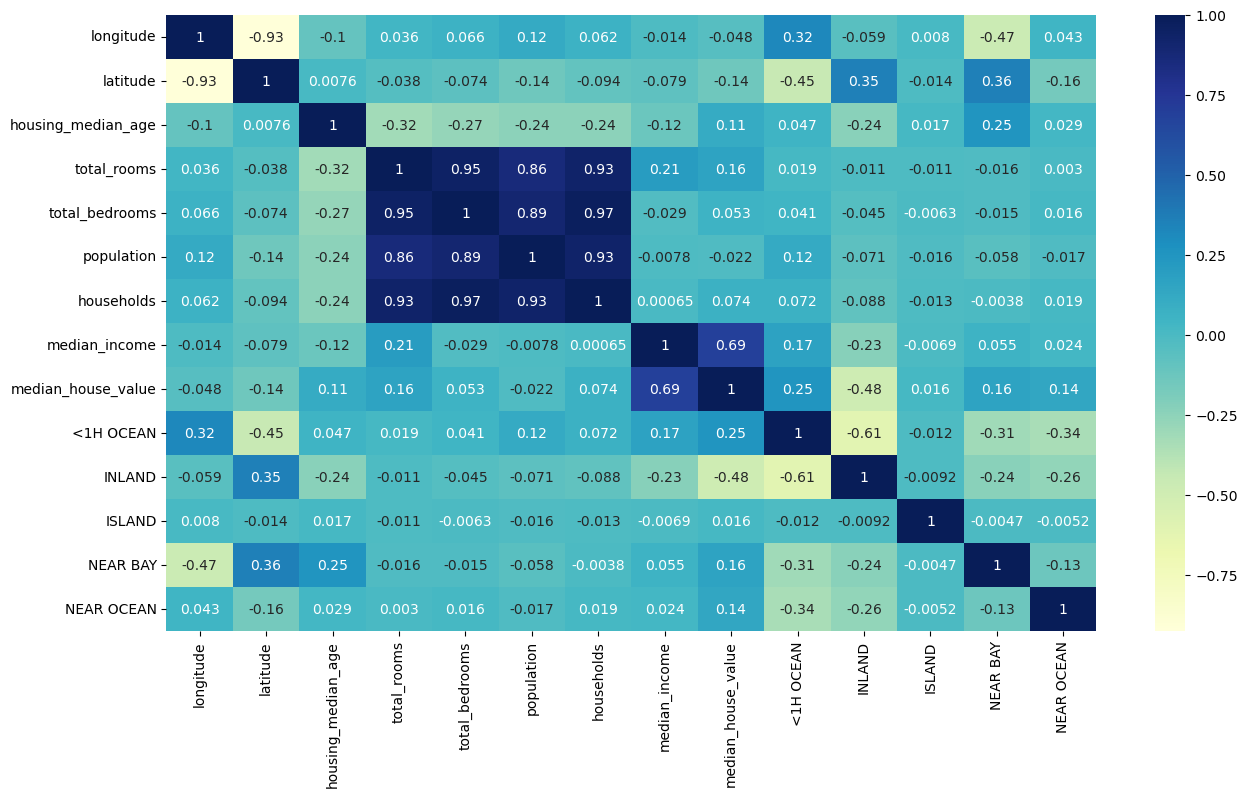

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

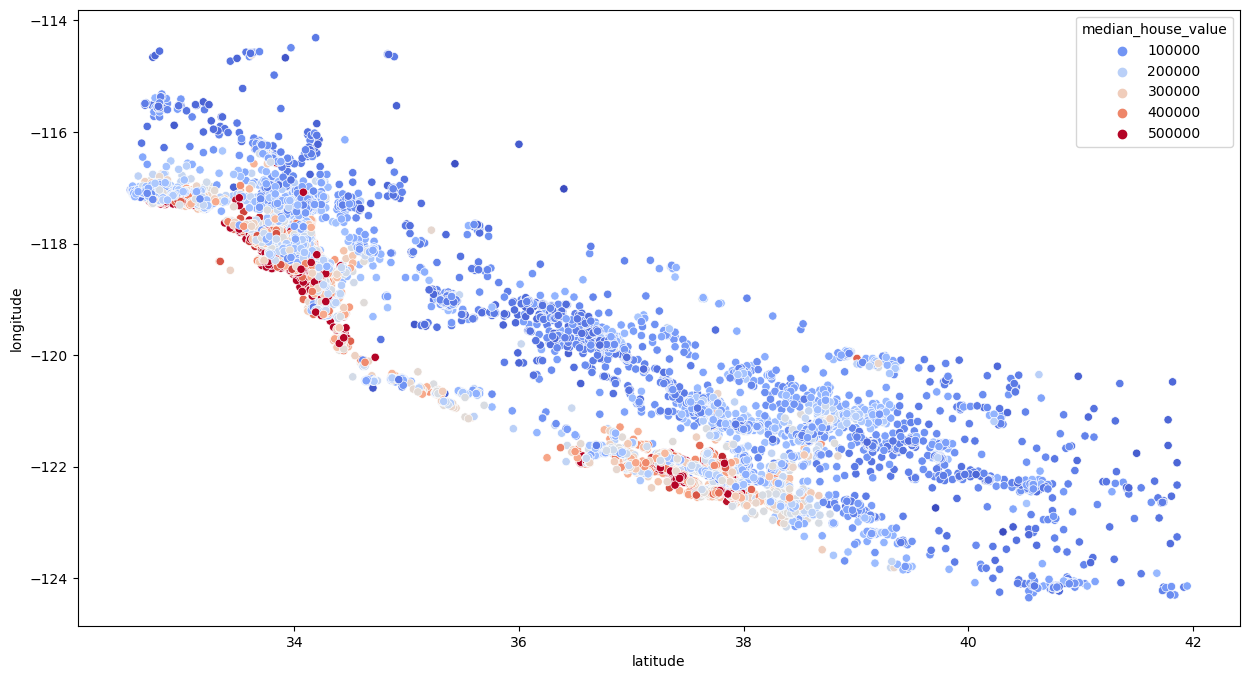

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

In [14]:
# We can observe that the houses near cost are more expensive

### Feature Engineering

In [15]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

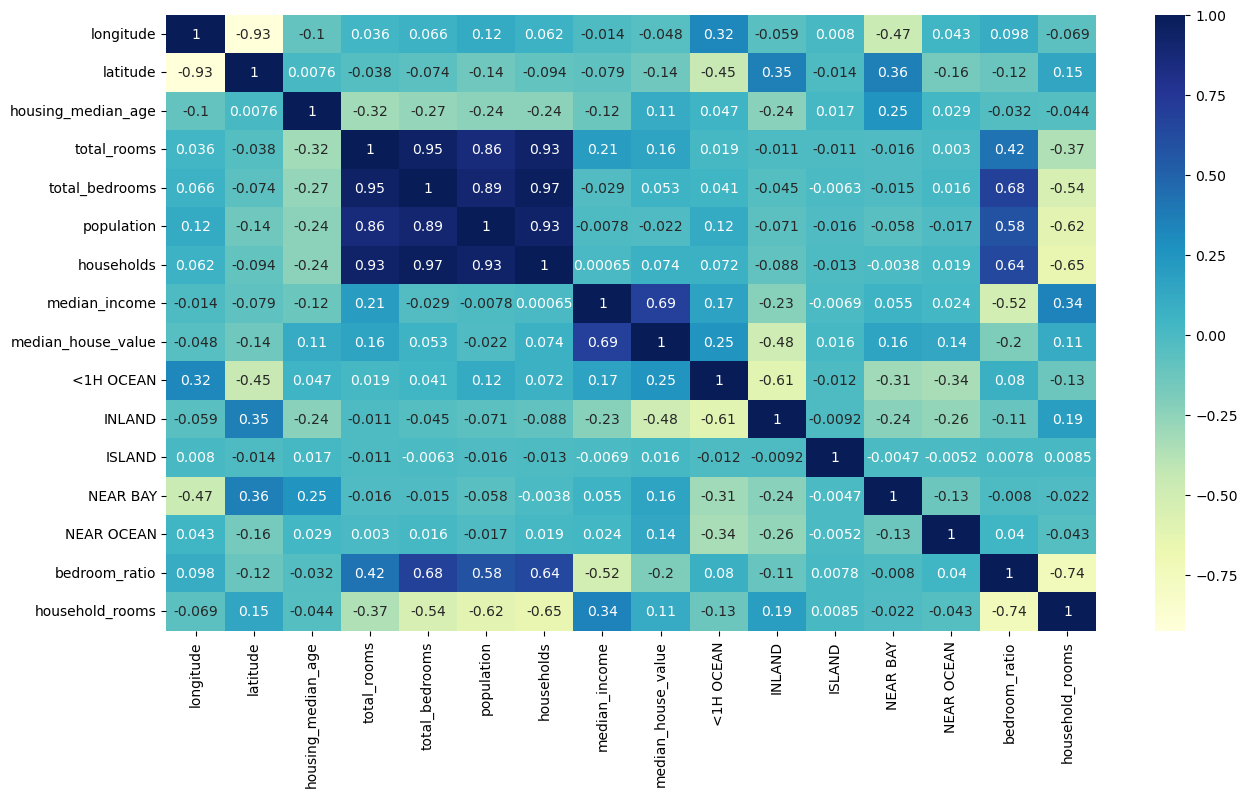

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### Linear Regression Model

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20351,-119.05,34.21,27.0,8.379769,6.831954,7.654917,6.776507,3.0119,218200.0,1,0,0,0,0,0.815291,1.236591
14855,-117.07,32.65,12.0,8.326517,6.793466,7.728856,6.734592,3.4701,204900.0,0,0,0,0,1,0.815883,1.236380
3295,-122.52,38.99,16.0,6.883463,5.393628,5.823046,5.049856,1.6607,77800.0,0,1,0,0,0,0.783563,1.363101
11236,-117.96,33.81,34.0,7.256297,5.627621,6.888572,5.652489,4.7772,182500.0,1,0,0,0,0,0.775550,1.283735
16442,-121.29,38.14,34.0,7.313887,5.823046,6.514713,5.645447,2.5150,110800.0,0,1,0,0,0,0.796163,1.295537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,-118.46,34.06,20.0,8.603187,7.334982,7.697575,7.274480,4.2554,500001.0,1,0,0,0,0,0.852589,1.182653
16424,-121.38,37.88,44.0,7.055313,5.424950,6.998510,5.416100,2.6842,156300.0,0,1,0,0,0,0.768917,1.302655
3416,-118.41,34.29,32.0,7.372746,5.771441,7.506042,5.726848,4.2969,145800.0,1,0,0,0,0,0.782807,1.287400
5889,-118.34,34.15,40.0,8.029107,6.629363,7.082549,6.545350,3.5637,497400.0,1,0,0,0,0,0.825666,1.226689


In [21]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)
boolean_columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
test_data[boolean_columns] = test_data[boolean_columns].astype(int)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
reg.score(X_test, y_test)

0.664506910865082

### Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test, y_test)

0.8122173164407693

In [32]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[100, 200, 300],
    "max_features":[2, 4,],
    "max_depth":[None, 4, 8]
}


grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest.score(X_test, y_test)

0.8060335775449357